<a href="https://colab.research.google.com/github/hpk24/MiniProject/blob/master/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This program classify images

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#Look at the data types of the variable
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get the shape of the arrays
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_train shape :  (50000, 32, 32, 3)
y_train shape :  (50000, 1)
x_test shape :  (10000, 32, 32, 3)
y_test shape :  (10000, 1)


In [ ]:
#Take a look at first image as an array
index = 10
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

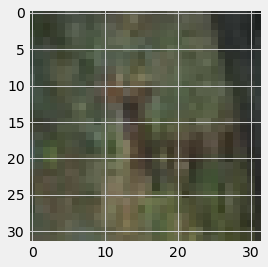

In [ ]:
#show the image as a picture
img = plt.imshow(x_train[index])

In [ ]:
#Get the image label
print('The image label is : ', y_train[index])

The image label is :  [4]


In [ ]:
#Get the image clssification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is : ', classification[y_train[index][0]]) 

The image class is :  deer


In [ ]:
#Convert the labels into a set of 10 numbers to imput into the neural networks
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#print the new label of the image or picture above
print('The one hot label is : ', y_train_one_hot[index])

The one hot label is :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#Normalize the pixels to be the values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
#Creates the model architecture
model = Sequential()

#Add the first layer
model.add( Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))

#Add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)) )

#Add another convolution layer
model.add( Conv2D(32, (5, 5), activation='relu'))

#Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)) )

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 55s 349ms/step - loss: 1.4542 - accuracy: 0.4630 - val_loss: 1.3213 - val_accuracy: 0.5270
Epoch 3/10
157/157 [==============================] - 55s 349ms/step - loss: 1.3064 - accuracy: 0.5253 - val_loss: 1.1963 - val_accuracy: 0.5713
Epoch 4/10
157/157 [==============================] - 55s 349ms/step - loss: 1.2030 - accuracy: 0.5659 - val_loss: 1.1276 - val_accuracy: 0.6003
Epoch 5/10
157/157 [==============================] - 55s 350ms/step - loss: 1.1216 - accuracy: 0.5960 - val_loss: 1.1695 - val_accuracy: 0.5825
Epoch 6/10
157/157 [==============================] - 55s 349ms/step - loss: 1.0570 - accuracy: 0.6222 - val_loss: 1.0673 - val_accuracy: 0.6234
Epoch 7/10
157/157 [==============================] - 55s 349ms/step - loss: 0.9948 - accuracy: 0.6468 - val_loss: 1.0845 - val_accuracy: 0.6217
Epoch 8/10
157/157 [==============================] - 55s 349ms/step - loss: 0.9351 - accuracy: 0.6713 - val_loss: 0.9886 - val_ac

In [ ]:
#Evaluate the model using the test dataset
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 0.9297 - accuracy: 0.6760


0.6759999990463257

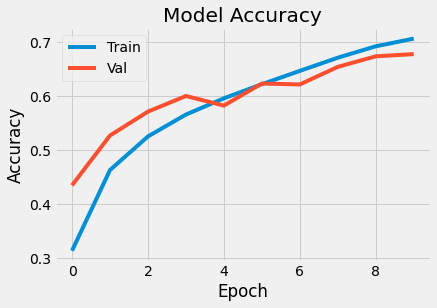

In [ ]:
#visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

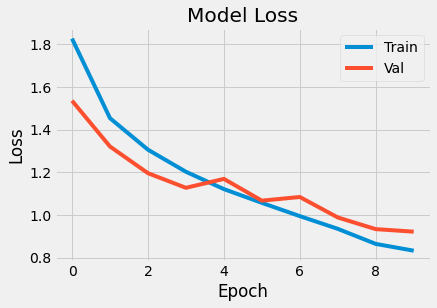

In [ ]:
#visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [ ]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


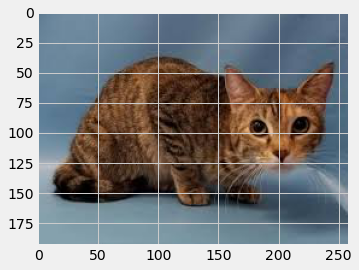

In [ ]:
#Show the image
new_image = plt.imread('cat.jpg')
img = plt.imshow(new_image)

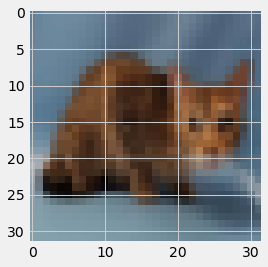

In [ ]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
#Get the model predictions
predictions = model.predict(np.array([resized_image]))
predictions

array([[0.00630549, 0.00192006, 0.0241555 , 0.6427891 , 0.01199575,
        0.13481009, 0.04956226, 0.02784372, 0.02143589, 0.07918213]],
      dtype=float32)

In [ ]:
#Sort the predictions form least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)

[3, 5, 9, 6, 7, 2, 8, 4, 0, 1]


In [ ]:
#print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100, 2), '%')


cat : 64.28 %
dog : 13.48 %
truck : 7.92 %
frog : 4.96 %
horse : 2.78 %
